#(첫 번째 과제) pandas 활용하기

In [2]:
import pandas as pd
import numpy as np

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)

sums = df.select_dtypes(np.number).sum().rename('Total')
df_total = pd.concat([df, pd.DataFrame([sums])])

df_total['Average'] = df_total.select_dtypes(np.number).mean(axis=1)

print(df_total)

         2007   2008   2009   2010   2011  Average
China    7.71   7.95  11.96  15.84  16.33   11.958
EU      19.02  17.71  15.00  16.70  17.48   17.182
US      10.47   8.45   5.58   7.60   8.40    8.100
Japan   10.87  10.83   7.55   9.09   7.88    9.244
Korea    4.04   3.78   3.45   4.20   4.62    4.018
Mexico   2.01   2.05   1.50   2.25   2.54    2.070
Total   54.12  50.77  45.04  55.68  57.25   52.572


#(두 번째 과제) 시계열데이터 활용하기

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

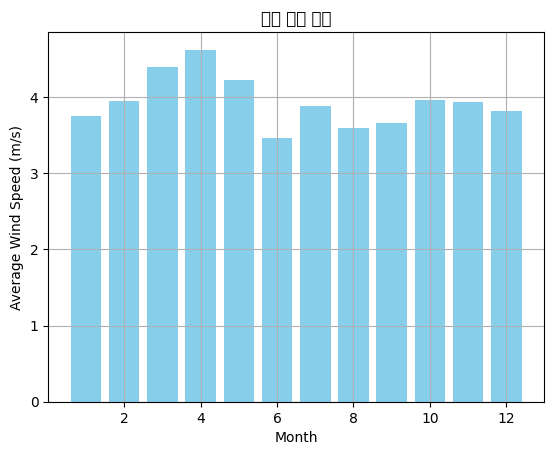

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_file = 'https://raw.githubusercontent.com/dongupak/DataML/main/csv/weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')

weather['일시'] = pd.to_datetime(weather['일시'], errors='coerce')

weather['month'] = weather['일시'].dt.month

monthly_wind = [0 for _ in range(12)]

for i in range(12):
    monthly_data = weather[weather['month'] == (i + 1)]
    monthly_wind[i] = monthly_data['평균풍속'].mean()

months = np.arange(1, 13)
plt.bar(months, monthly_wind, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (m/s)')
plt.title('월별 평균 풍속')
plt.grid(True)
plt.show()